In [11]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [12]:
load_dotenv()

True

## Create a Pie chart for out liquid assets

In [13]:
#assumption: we have our crypto coins: litecoin and tezos
my_lc = 100
my_tz = 500

In [14]:
#crypto API's

lc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=USD"
tz_url = "https://api.alternative.me/v2/ticker/Tezos/?convert=USD"

In [15]:
#get prices
lc_response = requests.get(lc_url).json()
lc_price = lc_response['data']['2']['quotes']['USD']['price']

tz_response = requests.get(tz_url).json()
tz_price = tz_response['data']['2011']['quotes']['USD']['price']

#get current value of "my crpytos"
my_lc_value= my_lc * lc_price
my_tz_value= my_tz * tz_price

#print output on crypto wallet
print(f"My litecoin balance is {my_lc_value}")
print(f"My tezo balance is {my_tz_value}")

My litecoin balance is 8506.0
My tezo balance is 1150.0


In [16]:
#assumtpion: our stocksm AMAT, and ORCL

my_ORCL = 100
my_AMAT = 100



In [17]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = str(alpaca_api_key)
alpaca_secret_key = str(alpaca_secret_key)

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
alpaca_api_key

'PKC15QNA0N6V3XUMQKFD'

In [21]:
from datetime import datetime
startdate = datetime.fromisoformat('2020-11-20')

#iso format
today = pd.Timestamp(startdate, tz= "America/New_York").isoformat()

tickers = ['ORCL', 'AMAT']

timeframe = '1D'

#get closing prices
df_investments = alpaca.get_barset(tickers,timeframe, start = today).df

#take a peek
df_investments.head()

AMAT                                 ORCL         \
                           open   high    low  close   volume   open   high   
2020-11-20 00:00:00-05:00  77.2  78.57  76.68  76.72  6733058  56.36  56.44   

                                                  
                             low close    volume  
2020-11-20 00:00:00-05:00  55.68  55.7  13763956

In [22]:
ORCL_close_price = round(df_investments[tickers[0]]['close'][0], 2)
AMAT_close_price = round(df_investments[tickers[0]]['close'][0], 2)

In [25]:
my_ORCL_Value = my_ORCL *ORCL_close_price
my_AMAT_Value = my_AMAT *AMAT_close_price

## pie chart for saving analysis

In [32]:
monthly_income = 60000

#put assets into a list

savings_data = [
    my_lc_value+my_tz_value,
    my_ORCL_Value+my_AMAT_Value
    
]

# create savings DF
df_savings = pd.DataFrame(savings_data, columns=['amount'], index = ['crypto', 'shares'])

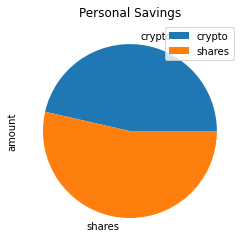

In [33]:
df_savings.plot.pie(y='amount', title = 'Personal Savings')

In [34]:
#emergency fund

emergency_fund = monthly_income * 3

#calc_savings
total_savings = float(df_savings.sum())

#check if we have enough savings

if total_savings > emergency_fund:
    print("You're Responsible")
elif total_savings ==emergency_fund:
    print("You have exactly 3 months saved up")
else:
    print("You need" +str(emergency_fund-total_savings)+"to save more!")

You need159204.0to save more!


## Simulations

In [36]:
#set start and end date for API Data

start_date = pd.Timestamp('2017-11-17', tz= "America/New_York").isoformat()


In [38]:
# get clsing prices with alpaca.get_barset


#apply MC SIM for 30 years

MC_thirty_year = MCSimulation(portoflio_data = df_stock_data, weights = [.5, .5], num_simulation = 100, num_trading_days = 252*2)

NameError: name 'df_stock_data' is not defined

In [ ]:
#run the forcat for 30 years
MC_thirty_year.calc_cumulative_return()

#lineplot

line_plot = MC_thirty_year.plot_simulation()

#plot return distribution and CI

dist_plot = MC_thirty_year.plot_distribution()

#summary stats

tbl = MC_thirty_year.summarize_cumulative_return()
print(tbl)

#final analysis

int_investment = 10000
#upper and lower confidence intervals

CI_lower = round(tbl[-2] * int_investment,2)
CI_upper = round(tbl[-1] * int_investment,2)

print(CI_lower)
print(CI_upper)

print(f"there is a 95% chaneg that your initial investment of {int_investment} will grow  to )